# 05 Single Layaer Perceptron new

In [1]:
#conda install numpy matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('ggplot')
import numpy as np

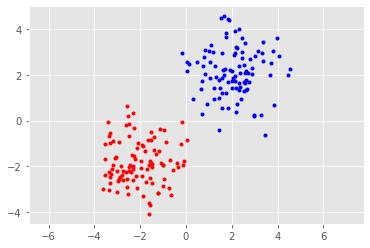

In [2]:
n=100
x1=np.concatenate((np.random.randn(n)+2,np.random.randn(n)-2))
x2=np.concatenate((np.random.randn(n)+2,np.random.randn(n)-2))
yt=np.ones( (2*n,1))
yt[n:]=-1
plt.axis('equal')
plt.plot(x1[(yt==1)[:,0]],x2[(yt==1)[:,0]],'.b')
plt.plot(x1[(yt==-1)[:,0]],x2[(yt==-1)[:,0]],'.r')

In [3]:
x=np.concatenate( (x1.reshape((-1,1)), x2.reshape((-1,1))), axis=1 )
x.shape

(200, 2)

In [4]:
def forward(x,w,b):
    z=np.dot(x,w)+b
    yp=np.tanh(z)
    return yp    

In [40]:
#x.shape: (200,2)
#w.shape: (2,1)
#b, z and yp are scalar
alpha=0.01
w=np.random.randn(2,1)
b=np.random.randn()
for i in range(10):
    yp=forward(x,w,b)
    L=0.5*np.average((yp-yt)*(yp-yt)) 
    #backpropagation
    b=b-alpha*np.sum( (yp-yt)*(1.0-yp*yp)*1.0 )
    #(200,2).T * (200,1)
    #w1=w1-alpha*(yp-yt)*(1.0-yp*yp)*(np.array([x1]).T)
    #w2=w2-alpha*(yp-yt)*(1.0-yp*yp)*(np.array([x2]).T)
    w=w-alpha*np.dot(x.T,((yp-yt)*(1.0-yp*yp)))
    print(L)

0.8195387113560474
0.0002518323034155012
0.000251404222460787
0.00025097808659606003
0.0002505538766378799
0.00025013157371207373
0.00024971115924727634
0.0002492926149686295
0.0002488759228916325
0.0002484610653161448


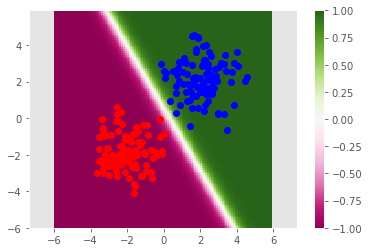

In [41]:
my,mx=np.mgrid[slice(-6,6,0.1),slice(-6,6,0.1)]
out=np.zeros(mx.shape)
for i in range(mx.shape[0]):
    for j in range(mx.shape[1]):
        u=[ mx[i,j], my[i,j]]
        out[i,j]=forward(u,w,b)
plt.pcolor(mx,my,out,cmap=cm.PiYG)
plt.colorbar()
plt.axis('equal')
plt.plot(x1[(yt==1)[:,0]],x2[(yt==1)[:,0]],'ob')
plt.plot(x1[(yt==-1)[:,0]],x2[(yt==-1)[:,0]],'or')